## Import packages

In [106]:
import os
import json
import random
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

## Load buckets

In [7]:
file_path = '../../../data/InceptionV1/aggregated_bucket/buckets.json'
with open(file_path, 'r') as f:
    data = json.load(f)

## Histogram of group size

In [10]:
group_size_d = {}

for blk in data:
    for group in data[blk]:
        size = len(data[blk][group])
        if size not in group_size_d:
            group_size_d[size] = 0
        group_size_d[size] += 1

In [149]:
def save_hist(bucket_path, file_path):
    
    # Load buckets
    with open(bucket_path, 'r') as f:
        data = json.load(f)
        
    # Group size
    group_size_d = {}
    for blk in data:
        for group in data[blk]:
            size = len(data[blk][group])
            if size not in group_size_d:
                group_size_d[size] = 0
            group_size_d[size] += 1
            
    sorted_group_sizes = sorted(group_size_d.items(), key=lambda x: x[1])
    X = [x[0] for x in sorted_group_sizes]
    Y = [x[1] for x in sorted_group_sizes]
    plt.bar(X, Y, width=3)
    plt.title('group size histogram')
    plt.xlabel('size of group')
    plt.ylabel('number of groups')
    plt.savefig(file_path)
    plt.show()

## Set 1 - Manually picked sets

In [133]:
num_sets = 15
set_size = 5

def make_hand_sets():

    hand_sets = [
        ['mixed3a-55', 'mixed3a-62', 'mixed3a-64', 'mixed3-66', 'mixed3a-129'], # mesh
        ['mixed3a-207', 'mixed3a-210', 'mixed3a-214', 'mixed3a-223', 'mixed3a-226'], # red
        ['mixed3b-1', 'mixed3b-123', 'mixed3b-130', 'mixed3b-258', 'mixed3b-332'], # |
        ['mixed3b-6', 'mixed3b-22', 'mixed3b-66', 'mixed3b-60', 'mixed3b-105'], # center circle
        ['mixed4a-50', 'mixed4a-96', 'mixed4a-98', 'mixed4a-267', 'mixed4a-273'], # circle top
        ['mixed4a-92', 'mixed4a-136', 'mixed4a-161', 'mixed4a-300', 'mixed4a-446'], # eye
        ['mixed4b-108', 'mixed4b-191', 'mixed4b-214', 'mixed4b-218', 'mixed4b-278'], # human face
        ['mixed4b-14', 'mixed4b-24', 'mixed4b-35', 'mixed4b-60', 'mixed4b-61'], # dog face
        ['mixed4c-35', 'mixed4c-47', 'mixed4c-86', 'mixed4c-144', 'mixed4c-200'], # dog face black white,
        ['mixed4c-38', 'mixed4c-91', 'mixed4c-114', 'mixed4c-159', 'mixed4c-344'], # brown animal face
        ['mixed4d-74', 'mixed4d-84', 'mixed4d-141', 'mixed4d-169', 'mixed4d-173'], # car wheel
        ['mixed4d-81', 'mixed4d-113', 'mixed4d-177', 'mixed4d-196', 'mixed4d-246'], # fish
        ['mixed4d-46', 'mixed4d-251', 'mixed4d-466', 'mixed4d-475', 'mixed4d-504'], # bird
        ['mixed4e-16', 'mixed4e-580', 'mixed4e-610', 'mixed4e-651', 'mixed4e-710'], # bottleneck
        ['mixed4e-460', 'mixed4e-523', 'mixed4e-673', 'mixed4e-674', 'mixed4e-756'], # car window
    ]
    
    random.shuffle(hand_sets)
    
    return hand_sets


## Set 2 - Our sets

In [121]:
def make_our_sets(bucket_path, num_sets, set_size):
    
    # Load buckets
    with open(file_path, 'r') as f:
        data = json.load(f)
        
    # Group size
    group_size_d = {}
    for blk in data:
        for group in data[blk]:
            size = len(data[blk][group])
            if size not in group_size_d:
                group_size_d[size] = 0
            group_size_d[size] += 1
    

    # Find candidates
    candidates = []
    for blk in data:
        for group in data[blk]:
            size = len(data[blk][group])
            if size >= set_size:
                candidates.append(data[blk][group])

    # Pick groups
    picked_group_idx = np.random.choice(np.arange(len(candidates)), num_sets)
    picked_groups = []
    for idx in picked_group_idx:
        neurons = candidates[idx]
        picked_neuons = np.random.choice(neurons, set_size)
        picked_groups.append(list(picked_neuons))
        
    random.shuffle(picked_groups)
    
    return picked_groups

## Set 3 - Random sets

In [122]:
def make_random_sets(num_sets, set_size):

    # Constant
    layer_size = {
        'mixed3a': 256,
        'mixed3b': 480,
        'mixed4a': 508,
        'mixed4b': 512,
        'mixed4c': 512,
        'mixed4d': 528,
        'mixed4e': 832,
        'mixed5a': 832,
        'mixed5b': 1024
    }

    # Find random groups
    random_groups = []
    rng = np.random.default_rng()
    for layer in layer_size:

        idx = sorted(rng.choice(layer_size[layer], set_size, replace=False))
        neurons = []
        for i in idx:
            neuron = '{}-{}'.format(layer, i)
            neurons.append(neuron)
        random_groups.append(neurons)
        
    random.shuffle(random_groups)
    random_groups = random_groups[:num_sets]
    
    return random_groups

## Save the results

In [140]:
def pick_random_neuron(blk):

    blk_size = {
        'mixed3a': 256,
        'mixed3b_3x3': 128,
        'mixed3b_5x5': 32,
        'mixed3b': 480,
        'mixed4a_3x3': 96,
        'mixed4a_5x5': 16,
        'mixed4a': 508,
        'mixed4b_3x3': 112,
        'mixed4b_5x5': 24,
        'mixed4b': 512,
        'mixed4c_3x3': 128,
        'mixed4c_5x5': 24,
        'mixed4c': 512,
        'mixed4d_3x3': 144,
        'mixed4d_5x5': 32,
        'mixed4d': 528,
        'mixed4e_3x3': 160,
        'mixed4e_5x5': 32,
        'mixed4e': 832,
        'mixed5a_3x3': 160,
        'mixed5a_5x5': 48,
        'mixed5a': 832,
        'mixed5b_3x3': 192,
        'mixed5b_5x5': 48,
        'mixed5b': 1024
    }
    
    total = blk_size[blk]
    n = np.random.randint(0, total, size=1)[0]
    
    return '{}-{}'.format(blk, n)

In [127]:
today = date.today()
today = today.strftime('%Y-%m-%d')
main_dir = '../../../data/InceptionV1/study_examples/sets-' + today
try:
    os.mkdir(main_dir)
except FileExistsError:
    pass

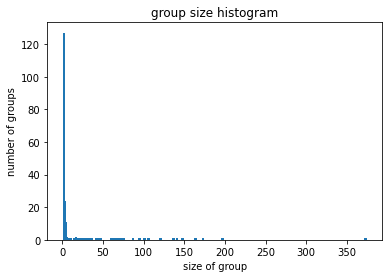

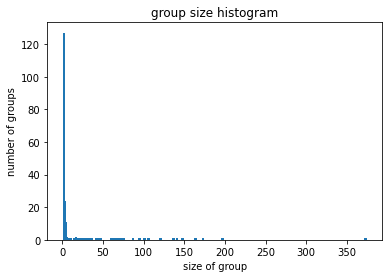

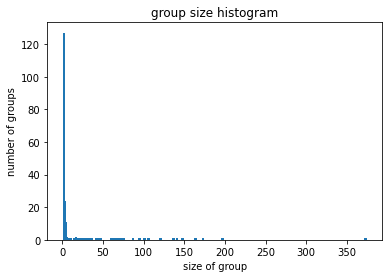

In [151]:
bucket_path = '../../../data/InceptionV1/aggregated_bucket/buckets.json'
img_dir = '../../../data/inceptionV1-vis/example-patch/'

num_sets = 15
set_size = 5
num_exs = 3

set_info = {}

for i in range(num_exs):
    
    dir_path = '{}/ex-{}'.format(main_dir, i)
    try:
        os.mkdir(dir_path)
    except FileExistsError:
        pass
    
    set_types = ['random'] * 5
    set_types += ['hand'] * 15
    set_types += ['nc'] * 15
    random.shuffle(set_types)

    idx_d = {
        'random': 0,
        'hand': 0,
        'nc': 0
    }
    
    hand_sets = make_hand_sets()
    our_sets = make_our_sets(bucket_path, num_sets, set_size)
    random_sets = make_random_sets(5, set_size)
    
    for ii, set_type in enumerate(set_types):
        
        j = idx_d[set_type]
        subdir_path = '{}/set-{}'.format(dir_path, ii)
        
        if set_type == 'random':
            neurons = random_sets[j]
        elif set_type == 'hand':
            neurons = hand_sets[j]
        elif set_type == 'nc':
            neurons = our_sets[j]
            
        blk = neurons[0].split('-')[0]
        rand_neuron = pick_random_neuron(blk)
            
        neurons.append(rand_neuron)
        random.shuffle(neurons)
        answer = neurons.index(rand_neuron)
        
        if set_type == 'random':
            answer = 'any'
            
        set_info[ii] = {
            'neurons': neurons,
            'type': set_type,
            'answer': answer
        }
        
        idx_d[set_type] += 1
        
        # Generate subdir
        try:
            os.mkdir(subdir_path)
        except FileExistsError:
            pass
        
        # Copy images
        for neuron_i, neuron in enumerate(neurons):
            neuron_path = '{}/neuron-{}'.format(subdir_path, neuron_i)
            try:
                os.mkdir(neuron_path)
            except FileExistsError:
                pass
                
            for img_i in range(10):
                img_path = '{}/{}-dataset-p-{}.jpg'.format(
                    img_dir, neuron, img_i
                )
                os.system('cp {} {}'.format(img_path, neuron_path))
    
    # Save set info
    with open(dir_path + '/set-info.json', 'w') as f:
        json.dump(set_info, f)
        
    # Save histogram
    save_hist(bucket_path, dir_path + '/group-size.png')
    